In [4]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

# Subiectul 1
### subpunct b: implementati in pgmpy reteaua bayesiana

In [14]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

model = BayesianNetwork([('A', 'C'), ('B', 'C'), ('C', 'D')])

cpd_a = TabularCPD(variable='A', variable_card=2, values=[[0.5], [0.5]])
cpd_b = TabularCPD(variable='B', variable_card=2, values=[[0.5], [0.5]])
cpd_c = TabularCPD(variable='C', variable_card=2,
                   values=[[0.9, 0.5, 0.2, 0.2], [0.1, 0.5, 0.8, 0.8]],
                   evidence=['A', 'B'], evidence_card=[2, 2])
cpd_d = TabularCPD(variable='D', variable_card=2,
                   values=[[0.2, 0.3], [0.8, 0.7]],
                   evidence=['C'], evidence_card=[2])

model.add_cpds(cpd_a, cpd_b, cpd_c, cpd_d)

assert model.check_model()

infer = VariableElimination(model)
prob_d = infer.query(variables=['D'])
print(prob_d)

+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.2550 |
+------+----------+
| D(1) |   0.7450 |
+------+----------+


# Subiectul 2
### subpunctul c

Media a posteriori ≈ 0.3311


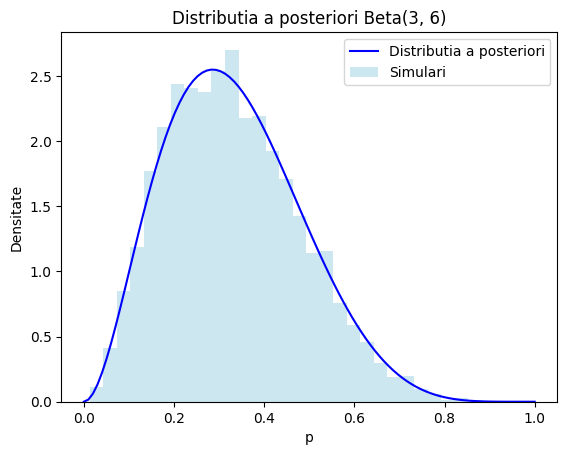

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

alpha_post = 3
beta_post = 6

samples = np.random.beta(alpha_post, beta_post, 5000)

mean_post = np.mean(samples)
print(f"Media a posteriori ≈ {mean_post:.4f}")

x = np.linspace(0, 1, 100)
y = beta.pdf(x, alpha_post, beta_post)
plt.plot(x, y, label='Distributia a posteriori', color='blue')
plt.hist(samples, bins=30, density=True, alpha=0.6, color='lightblue', label='Simulari')
plt.title('Distributia a posteriori Beta(3, 6)')
plt.xlabel('p')
plt.ylabel('Densitate')
plt.legend()
plt.show()